In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam_mail_classifier.csv')
df

,email_text,label
0,Let's catch up sometime next week!,ham
1,Don't forget to submit your project by Friday.,ham
2,Win a free iPhone now!!! Click here.,spam
3,Can you send me the report when it's ready?,ham
4,Meeting has been rescheduled to next Monday.,ham
...,...,...
995,Don't forget to submit your project by Friday.,ham
996,Meeting has been rescheduled to next Monday.,ham
997,Let's catch up sometime next week!,ham
998,Win a free iPhone now!!! Click here.,spam


In [3]:
df.isnull().sum()

email_text    0
label         0
dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
{i: key for key,i in enumerate(list(df["email_text"].unique()))}

{"Let's catch up sometime next week!": 0,
 "Don't forget to submit your project by Friday.": 1,
 'Win a free iPhone now!!! Click here.': 2,
 "Can you send me the report when it's ready?": 3,
 'Meeting has been rescheduled to next Monday.': 4,
 'Limited-time offer! Free membership upgrade.': 5,
 'Congratulations! You’ve been selected for a cash prize.': 6,
 'Hey, are we still on for lunch tomorrow?': 7,
 'You won a lottery. Claim your money now.': 8,
 'Get cheap loans instantly without any paperwork.': 9}

In [6]:
dt1 = {"Let's catch up sometime next week!": 0,
 "Don't forget to submit your project by Friday.": 1,
 'Win a free iPhone now!!! Click here.': 2,
 "Can you send me the report when it's ready?": 3,
 'Meeting has been rescheduled to next Monday.': 4,
 'Limited-time offer! Free membership upgrade.': 5,
 'Congratulations! You’ve been selected for a cash prize.': 6,
 'Hey, are we still on for lunch tomorrow?': 7,
 'You won a lottery. Claim your money now.': 8,
 'Get cheap loans instantly without any paperwork.': 9}

df["email_text"] = df["email_text"].map(dt1)
df

,email_text,label
0,0,ham
1,1,ham
2,2,spam
3,3,ham
4,4,ham
8,5,spam
11,6,spam
15,7,ham
18,8,spam
50,9,spam


In [7]:
{i: key for key,i in enumerate(list(df["label"].unique()))}

{'ham': 0, 'spam': 1}

In [8]:
dt2 = {'ham': 0, 'spam': 1}

df["label"] = df["label"].map(dt2)
df.head()

,email_text,label
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [9]:
x = df.drop("label",axis=1)
y = df[["label"]]

In [10]:
## training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,
    random_state=42
)

In [11]:
## Algorithm

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
model.score(x_test,y_test)

1.0

In [13]:
model.score(x_train,y_train)

0.75

In [14]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,label,prediction
18,1,1
1,0,0


In [15]:
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
confusion_matrix(y_test["label"],y_test["prediction"])

array([[1, 0],
       [0, 1]], dtype=int64)

<Axes: >

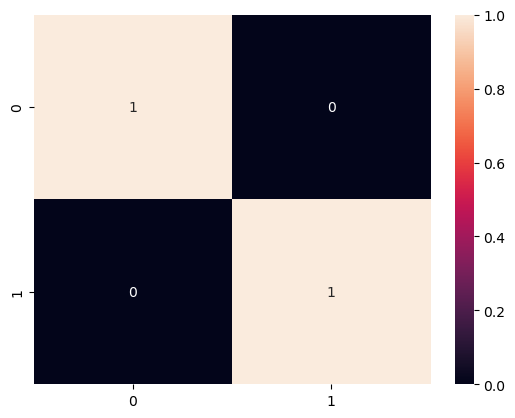

In [17]:
sns.heatmap(confusion_matrix(y_test["label"],y_test["prediction"]),annot=True,fmt="d")

In [18]:
## classification report
print(classification_report(y_test["label"],y_test["prediction"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

